In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

import warnings
warnings.filterwarnings("ignore")

(600, 600, 3)


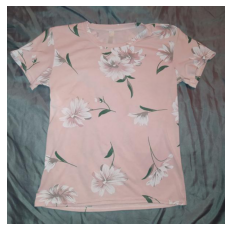

In [2]:
path_to_jpg_file = "/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16f1fbdf-d339-40f6-aecb-e55199db7a96.jpg"
img = mpimg.imread(path_to_jpg_file)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
pixels = img.reshape((-1,3))

print(pixels.shape)

(360000, 3)


In [4]:
pixels[0]

array([56, 50, 52], dtype=uint8)

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph

In [18]:
img = pixels[::2, ::2] + pixels[1::2, ::2] + pixels[::2, 1::2] + pixels[1::2, 1::2]


In [19]:
X = np.reshape(img, (-1, 1))

In [20]:
connectivity = grid_to_graph(*img.shape)

In [28]:
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)

In [29]:
label = np.reshape(ward.labels_, img.shape)

In [30]:
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Number of pixels:  360000
Number of clusters:  15


In [25]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [31]:
 cluster_labels = ward.fit_predict(X)

In [48]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward', connectivity=connectivity)

In [49]:
labels2 = agg.fit_predict(pixels)

In [52]:
silhouette_avg = silhouette_score(pixels, labels2)

In [65]:
print(silhouette_avg)

-0.22688980294569164


In [53]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, labels2)}')

calinski_harabasz_score: 29842.54059804826


In [58]:
results2 = {}
for i in range(2,10):
    agg = AgglomerativeClustering(n_clusters=i, linkage='ward', connectivity=connectivity)
    labels2 = agg.fit_predict(pixels)
    ch_index = metrics.calinski_harabasz_score(pixels, labels2)
    results2.update({i: ch_index})

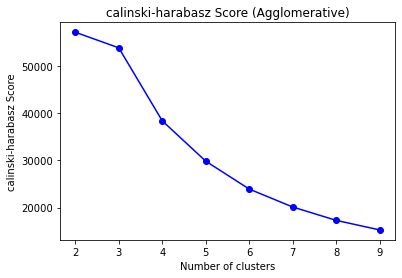

In [61]:
plt.plot(list(results2.keys()), list(results2.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("calinski-harabasz Score")
plt.title('calinski-harabasz Score (Agglomerative)')
plt.show()

In [62]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, labels2)}')

davies_bouldin_score: 12.279057429144261


In [63]:
results3 = {}
for i in range(2,10):
    agg = AgglomerativeClustering(n_clusters=i, linkage='ward', connectivity=connectivity)
    labels3 = agg.fit_predict(pixels)
    db_index = davies_bouldin_score(pixels, labels3)
    results3.update({i: db_index})

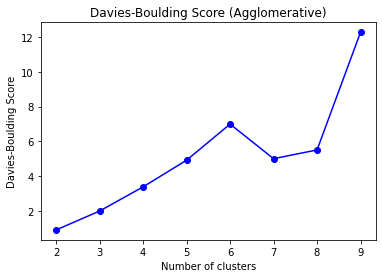

In [64]:
plt.plot(list(results3.keys()), list(results3.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Score")
plt.title('Davies-Boulding Score (Agglomerative)')
plt.show()

In [ ]:
results1 = {}
for i in range(2,10):
    agg = AgglomerativeClustering(n_clusters=i, linkage='ward', connectivity=connectivity)
    labels1 = agg.fit_predict(pixels)
    ss_index = silhouette_score(pixels, labels1)
    results1.update({i: ss_index})